# Reingest with new butler 

Code testing parts of `baseComcamLoop.py` that were taken in order to regenerate the calibs, and images, with an updated stack version.

First, I `ssh epyc` , and source the setup script with a particular version of stack:
    
    source /epyc/users/suberlak/Commissioning/aos/setup_aos_2020_24.sh
    
Then I move to the `ts_phosim/notebooks/analysis_scripts/` : 
    
    cd /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/
    
There I execute the reingest script `reingestGaia.py` , that uses `reingestCloseLoop.py` for field at a given galactic latitude: 
(named fields are `med`, `low`, `Baade`):
    
    python reingestGaia.py --field high   
    
    

Show that with `lsst-aos`, which uses `2020_24` version of stack, we can ingest the postISR image from the new location

In [5]:
import sys
sys.path.append('../analysis_tools/')
import analysisTools as at 
import os 
import matplotlib.pyplot as plt


baseDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_gaia'
resDir = 'dr2_high_gt11_reingest'
data_dir = os.path.join(baseDir, topDir,resDir)

raft = 'R22'
detector ='S11'
sensor  = '%s_%s'%(raft,detector)
focalType='focal'
imageFocus = at.readPostISRImage(data_dir, focalType = focalType, obsId=9006000, 
                                 raft = raft, detector = detector,)


Reading data from /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/dr2_high_gt11_reingest
For sensor R22_S11 
Done



Text(0.5, 1.0, 'postISR image, sensor R22_S11, focal')

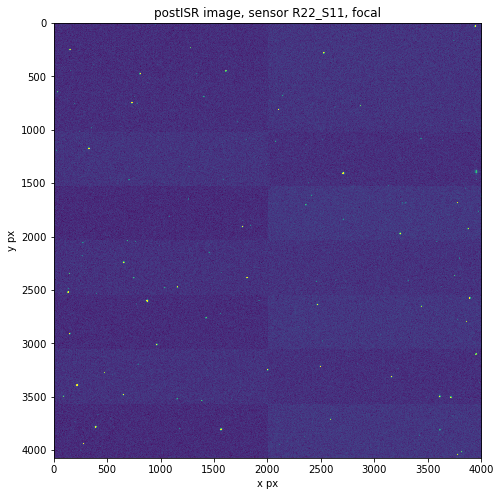

In [9]:
import numpy as np
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(np.log10(imageFocus.T), vmin=2.3,vmax=3.5)

ax.set_xlabel('x px')
ax.set_ylabel('y px')
ax.set_title('postISR image, sensor %s, %s'%(sensor,focalType))